# Ubongo 3D family solver &

This script solves a given **puzzle** with a set of **pieces**.

+ **Puzzles** are identified by their code (available in the bottom right of the Ubongo puzzle card), e.g., *4-24*.
+ **Pieces** are standard Ubongo 3D pieces identified by the combination of their *color* and *size*. For example, `b5` represents the *blue* piece that has a unit size of *5*.

## Solve a puzzle

To solve a puzzle, go to the <a href='#solver'>Ubongo 3D family solver</a> and provide:

+ `target_puzzle`: puzzle to solve
+ `target pieces`: list of standard Ubongo 3D pieces

    
E.g., 

```
target_puzzle = "4-24"
target_pieces = ['b5', 'g5', 'r2', 'y4']
```

Running `solve_puzzle` will produce the number of solutions, while `plot_solutions` will provide a simple graphical representation of each solution.

E.g.,

<img src="sample_solution.png" alt="solution#1 for 4-24" width="300"/>
<img src="sample_solution2.png" alt="solution#2 for 4-24" width="300"/>

## Create your own puzzles

The script contains all puzzles from Ubongo 3D family.

To create your own puzzle, add a new data entry to `puzzle_coordinates` with the *(x,y)* unit coordinates of your puzzle defined as integer tuples. E.g., `(1,2)` sets a unit puzzle with coordinates `(x=1, y=2)`, where `(0,0)` is in the bottom left. The `PUZZLE_HEIGHT` defines the height of the puzzle, which in Ubongo 3D family is 2. This can be changed to 3 or 4. Beware, running time will be long enough so that you might want to solve it by yourself.

E.g.,

```
"running_centipede": [(1,0),(1,1),(1,2),(1,3),(1,4),(1,5),(0,2),(0,4),(2,1),(2,3)]
```

<img src="custom_puzzle1.png" alt="running_centipede#1" width="400"/>
<img src="custom_puzzle2.png" alt="running_centipede#1" width="400"/>

## Get all piece combination solutions for a given puzzle 

To get all piece combination solutions for a given puzzle, go to <a href='#finder'>Get all piece combination solutions for a given puzzle</a> and provide:

+ `target_puzzle`: puzzle to solve
    
E.g.,

```
target_puzzle = "running_centipede"
```

Running `find_all_solvable_piece_combinations` will look at each piece combination and will provide the following:
+ valid piece combination given the target puzzle, with the number of solutions of the piece combination
+ total number of solvable combinations
+ total number of valid combinations (where total number of piece unit sizes is exactly the unit size of the puzzle)

Thus you can check your own puzzle, or find valid piece combinations not depicted on the Ubongo cards.
Also, adjusting `PUZZLE_HEIGHT` it's possible to find piece combinations for puzzles of greater height. Again, it might take quite some time.   


## Disclaimer

This script is a weekend project for personal use only.

In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations
import itertools
from datetime import datetime

In [2]:
# puzzle height, in Ubongo 3D family is 2
PUZZLE_HEIGHT = 2

# transparency
ALPHA = 0.5

puzzle_coordinates = {
    "running_centipede": [(1,0),(1,1),(1,2),(1,3),(1,4),(1,5),(0,2),(0,4),(2,1),(2,3)],
    "short_centipede": [(1,0),(1,1),(1,2),(1,3),(1,4),(0,1),(2,1),(0,3),(2,3)],
    "headless_centipede": [(1,0),(1,1),(1,2),(1,3),(1,4),(0,1),(2,1),(0,3),(2,3),(1,5),(0,5),(2,5)],
    "fat_centipede": [(1,0),(1,1),(1,2),(1,3),(1,4),(0,1),(2,1),(0,3),(2,3),(0,2),(2,2)],
    "eye": [(1,0),(0,1),(0,2),(0,3),(1,1),(1,3),(1,4),(2,1),(2,2),(2,3)],
    "angrylefteye": [(2,0),(0,1),(0,2),(0,3),(1,1),(1,3),(0,4),(2,1),(2,2),(2,3)],
    "smallH": [(0,0),(0,1),(0,2),(1,1),(2,0),(2,1),(2,2)],
    "crookedH": [(0,0),(0,1),(0,2),(0,3),(1,2),(2,1),(2,2),(2,3),(2,4)],
    
    "Aron1": [(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(2,0)],
    "Aron2": [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3)],
    "Aron3": [(0,0),(0,1),(0,2),(0,3),(0,4),(1,1),(1,2),(1,3)],
    "Aron4": [(0,0),(0,1),(0,2),(1,0),(1,2),(2,0),(2,1),(2,2)],

    "1-1":[(0,0),(0,1),(0,2),(0,3),(0,4),(1,1)],
    "1-2":[(0,0),(1,0),(1,1),(2,0),(2,1),(3,1)],    
    "1-3":[(0,0),(0,1),(0,2),(0,3),(1,1),(1,2)],
    "1-4":[(0,0),(1,0),(2,0),(2,1),(2,2),(2,3)],
    "1-5":[(0,0),(0,1),(0,2),(1,1),(2,1),(2,2)],
    "1-6":[(0,1),(1,0),(1,1),(1,2),(2,2),(3,2)],
    "1-7":[(0,0),(0,1),(0,2),(0,3),(1,2),(1,3)],
    "1-8":[(0,3),(1,1),(1,2),(1,3),(2,0),(2,1)],
    "1-9":[(0,0),(0,1),(0,2),(1,0),(1,2),(2,0)],
    "1-10":[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)],
    "1-11":[(0,0),(0,1),(1,0),(2,0),(2,1),(3,0)],
    "1-12":[(0,0),(0,2),(1,0),(1,1),(1,2),(2,1)],
    "1-13":[(0,0),(0,1),(0,3),(1,1),(1,2),(1,3)],
    "1-14":[(0,1),(1,1),(2,0),(2,1),(3,1),(3,2)],
    "1-15":[(0,0),(1,0),(1,1),(1,2),(1,3),(2,2)],
    "1-16":[(0,1),(1,1),(1,2),(2,0),(2,1),(3,1)],
    "1-17":[(0,0),(1,0),(1,1),(1,2),(2,1),(3,1)],
    "1-18":[(0,1),(0,3),(1,0),(1,1),(1,2),(1,3)],
    "1-19":[(0,0),(1,0),(2,0),(3,0),(2,1),(2,2)],
    "1-20":[(0,1),(1,0),(1,1),(1,2),(1,3),(2,1)],
    "1-21":[(0,0),(0,1),(0,2),(0,3),(1,0),(1,1)],
    "1-22":[(0,0),(0,1),(1,1),(2,1),(2,2),(2,3)],
    "1-23":[(0,0),(0,1),(0,2),(1,0),(1,1),(2,1)],
    "1-24":[(0,2),(0,3),(1,0),(1,1),(1,2),(2,1)],
    "1-25":[(0,0),(1,0),(1,1),(1,2),(2,1),(2,2)],
    "1-26":[(0,1),(1,0),(1,1),(1,2),(2,0),(2,1)],
    "1-27":[(0,0),(0,1),(1,1),(1,2),(1,3),(2,1)],
    "1-28":[(0,1),(1,0),(1,1),(2,0),(2,1)],
    "1-29":[(0,0),(1,0),(1,1),(1,2),(2,2),(3,2)],
    "1-30":[(0,1),(1,1),(1,2),(2,0),(2,1),(3,1)],
    "1-31":[(0,0),(1,0),(1,1),(2,0),(2,1),(2,2)],
    "1-32":[(0,0),(0,1),(1,0),(1,1),(1,2),(2,0)],
    "1-33":[(0,1),(0,2),(1,1),(2,0),(2,1),(3,0)],
    "1-34":[(0,0),(0,1),(1,0),(1,1),(2,1),(2,2)],
    "1-35":[(0,0),(1,0),(1,1),(2,1),(3,0),(3,1)],
    "1-36":[(0,1),(1,0),(1,1),(2,1),(3,1),(3,2)],
    
    "2-1":[(0,3),(1,0),(1,1),(1,2),(1,3),(1,4),(2,0)],
    "2-2":[(0,0),(0,1),(0,2),(1,2),(2,2),(3,2),(3,3)],
    "2-3":[(0,0),(0,1),(0,2),(1,0),(1,2),(1,3),(2,2)],
    "2-4":[(0,0),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3)],
    "2-5":[(0,1),(1,0),(1,1),(1,2),(1,3),(2,0),(2,3)],
    "2-6":[(0,0),(0,2),(1,0),(1,1),(1,2),(1,3),(2,3)],
    "2-7":[(0,1),(1,1),(1,2),(2,0),(2,1),(3,1),(3,2)],
    "2-8":[(0,0),(0,1),(0,2),(0,3),(1,1),(1,3),(2,1)],
    "2-9":[(0,0),(0,1),(0,2),(0,3),(0,4),(1,2),(1,4)],
    "2-10":[(0,0),(1,0),(2,0),(2,1),(2,2),(3,2),(3,3)],
    "2-11":[(0,2),(0,3),(0,4),(1,0),(1,1),(1,2),(2,0)],
    "2-12":[(0,2),(1,2),(2,0),(2,1),(2,2),(2,3),(3,3)],
    "2-13":[(1,0),(1,1),(1,2),(0,2),(1,3),(1,4),(2,1)],
    "2-14":[(0,0),(0,1),(1,0),(2,0),(2,1),(3,1),(3,2)],
    "2-15":[(0,2),(1,0),(1,1),(1,2),(1,3),(1,4),(2,4)],
    "2-16":[(0,1),(1,0),(1,1),(1,2),(1,3),(2,1),(2,3)],
    "2-17":[(0,0),(0,1),(0,3),(1,1),(1,2),(1,3),(2,2)],
    "2-18":[(0,3),(1,0),(1,1),(1,3),(2,1),(2,2),(2,3)],
    "2-19":[(1,0),(2,0),(2,1),(2,2),(2,3),(1,3),(0,3)],
    "2-20":[(0,1),(1,0),(1,1),(2,1),(3,0),(3,1),(3,2)],
    "2-21":[(0,2),(1,0),(1,1),(1,2),(2,0),(2,2),(3,2)],
    "2-22":[(0,2),(1,2),(1,3),(2,1),(2,2),(3,0),(3,1)],
    "2-23":[(0,0),(0,2),(1,0),(1,1),(1,2),(2,2),(2,3)],
    "2-24":[(0,2),(0,3),(1,0),(1,1),(1,2),(2,1),(3,1)],
    "2-25":[(0,1),(1,0),(1,1),(2,1),(2,2),(2,3),(3,1)],
    "2-26":[(0,3),(1,1),(1,2),(1,3),(1,4),(2,0),(2,1)],
    "2-27":[(0,0),(0,1),(0,2),(0,3),(0,4),(1,0),(1,3)],
    "2-28":[(0,0),(0,1),(0,3),(1,1),(1,2),(1,3),(1,4)],
    "2-29":[(0,1),(1,1),(2,0),(2,1),(2,2),(2,3),(3,3)],
    "2-30":[(0,0),(0,1),(1,1),(1,2),(1,3),(1,4),(2,2)],
    "2-31":[(0,0),(0,1),(0,2),(1,0),(2,0),(2,1),(3,0)],
    "2-32":[(0,2),(1,2),(2,2),(2,3),(3,0),(3,1),(3,2)],
    "2-33":[(0,0),(0,1),(0,2),(1,2),(1,3),(1,4),(2,3)],
    "2-34":[(0,0),(1,0),(2,0),(2,1),(2,2),(2,3),(3,2)],
    "2-35":[(0,0),(0,2),(0,3),(0,4),(1,0),(1,1),(1,2)],
    "2-36":[(0,0),(0,1),(1,1),(1,2),(1,3),(1,4),(2,4)],
    
    "3-1": [(0,0),(0,1),(0,2),(1,0),(1,2),(1,3),(1,4),(2,4)],
    "3-2": [(0,1),(1,0),(1,1),(2,1),(2,2),(2,3),(2,4),(3,3)],
    "3-3": [(0,0),(0,1),(1,1),(1,2),(1,3),(1,4),(0,4),(2,4)],
    "3-4": [(0,3),(1,1),(1,2),(1,3),(1,4),(2,1),(3,0),(3,1)],
    "3-5": [(0,0),(0,2),(0,3),(1,0),(1,1),(1,2),(3,0),(3,2)],
    "3-6": [(0,1),(1,0),(1,1),(2,1),(3,1),(3,2),(3,3),(2,3)],
    "3-7": [(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,2),(3,2)],
    "3-8": [(0,3),(1,0),(1,2),(1,3),(1,4),(2,0),(2,1),(2,2)],
    "3-9": [(0,1),(1,0),(1,1),(2,1),(2,2),(2,3),(3,3),(3,4)],
    "3-10": [(0,2),(0,3),(1,3),(2,3),(2,2),(2,1),(2,0),(1,0)],
    "3-11": [(0,1),(0,2),(0,3),(1,0),(1,2),(2,0),(2,1),(2,2)],
    "3-12": [(0,0),(0,1),(0,2),(1,2),(2,2),(2,3),(2,4),(3,2)],
    "3-13": [(0,4),(1,0),(1,1),(1,2),(1,3),(1,4),(2,2),(2,4)],
    "3-14": [(0,3),(1,0),(1,1),(1,3),(2,1),(2,2),(2,3),(2,4)],
    "3-15": [(0,0),(1,0),(2,0),(2,1),(2,2),(2,3),(2,4),(3,3)],
    "3-16": [(0,2),(1,0),(1,2),(1,3),(2,0),(2,1),(2,2),(3,1)],
    "3-17": [(0,2),(1,0),(1,1),(1,2),(1,3),(2,0),(2,3),(2,4)],
    "3-18": [(0,1),(0,2),(1,0),(1,1),(2,1),(2,2),(2,3),(3,3)],
    "3-19": [(0,1),(1,0),(1,1),(1,2),(1,3),(2,0),(2,2),(3,2)],
    "3-20": [(0,3),(0,4),(1,1),(1,2),(1,3),(2,1),(3,1),(3,0)],
    "3-21": [(0,0),(1,0),(1,1),(1,2),(2,0),(2,2),(3,2),(3,3)],
    "3-22": [(0,2),(1,0),(1,2),(1,3),(2,0),(2,1),(2,2),(3,0)],
    "3-23": [(0,3),(0,4),(1,0),(1,1),(1,3),(2,1),(2,2),(2,3)],
    "3-24": [(0,2),(1,0),(1,1),(1,2),(1,3),(2,1),(3,1),(3,2)],
    "3-25": [(0,1),(0,2),(0,3),(1,0),(1,1),(1,3),(1,4),(2,1)],
    "3-26": [(0,3),(1,3),(2,0),(2,1),(2,2),(2,3),(2,4),(3,1)],
    "3-27": [(0,2),(0,3),(1,0),(1,1),(1,2),(2,0),(3,0),(3,1)],
    "3-28": [(0,3),(1,1),(1,2),(1,3),(1,4),(2,0),(2,1),(2,4)],
    "3-29": [(0,1),(1,0),(1,1),(1,2),(2,2),(3,2),(3,3),(3,4)],
    "3-30": [(0,0),(0,3),(1,0),(1,1),(1,2),(1,3),(2,1),(2,3)],
    "3-31": [(0,3),(1,2),(1,3),(2,0),(2,1),(2,2),(3,0),(3,2)],
    "3-32": [(0,2),(0,3),(1,2),(2,0),(2,1),(3,1),(2,2),(2,3)],
    "3-33": [(0,1),(1,1),(1,2),(1,3),(1,4),(2,0),(2,1),(2,3)],
    "3-34": [(0,3),(1,2),(1,3),(1,4),(2,0),(2,1),(2,2),(3,2)],
    "3-35": [(0,1),(1,1),(1,2),(1,3),(1,4),(2,0),(2,1),(3,0)],
    "3-36": [(0,0),(0,1),(0,2),(1,2),(2,2),(2,3),(2,4),(3,4)],

    "4-1": [(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(2,0),(3,0)],
    "4-2": [(0,1),(1,0),(1,1),(1,2),(1,3),(2,2),(2,3),(2,4)],
    "4-3": [(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3)],
    "4-4": [(0,3),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3),(3,2)],
    "4-5": [(0,2),(1,0),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3)],
    "4-6": [(0,0),(1,0),(1,1),(1,2),(2,0),(2,1),(3,1),(3,2)],
    "4-7": [(0,1),(1,0),(1,1),(1,2),(1,3),(2,1),(2,2),(3,2)],
    "4-8": [(0,1),(0,2),(1,0),(1,1),(1,2),(1,3),(2,2),(3,2)],
    "4-9": [(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(1,4),(2,3)],
    "4-10": [(0,1),(0,3),(1,0),(1,1),(1,2),(1,3),(2,1),(2,2)],
    "4-11": [(0,2),(1,0),(1,1),(1,2),(1,3),(1,4),(2,2),(2,3)],
    "4-12": [(0,1),(1,0),(1,1),(1,2),(1,3),(2,1),(2,2),(3,1)],
    "4-13": [(0,0),(0,3),(1,0),(1,1),(1,2),(1,3),(2,2),(2,4)],
    "4-14": [(0,1),(0,3),(1,0),(1,1),(1,2),(1,3),(2,2),(2,3)],
    "4-15": [(0,3),(1,0),(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)],
    "4-16": [(0,0),(0,2),(1,0),(1,1),(1,2),(2,1),(2,2),(3,2)],
    "4-17": [(0,0),(0,1),(0,2),(1,0),(1,1),(2,1),(2,2),(3,2)],
    "4-18": [(0,4),(1,1),(1,2),(1,3),(1,4),(2,0),(2,1),(2,2)],
    "4-19": [(0,2),(1,0),(1,1),(1,2),(1,3),(2,2),(2,3),(2,4)],
    "4-20": [(0,2),(0,3),(0,4),(1,0),(1,1),(1,2),(1,3),(2,3)],
    "4-21": [(0,0),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(2,3)],
    "4-22": [(0,0),(0,1),(0,2),(0,4),(1,1),(1,2),(1,3),(1,4)],
    "4-23": [(0,1),(0,2),(1,1),(2,0),(2,1),(2,2),(3,1),(3,2)], 
    "4-24": [(0,0),(0,1),(0,2),(0,3),(0,4),(1,1),(1,2),(1,4)],
    "4-25": [(0,2),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3),(3,0)],
    "4-26": [(0,1),(0,2),(0,3),(1,1),(1,2),(2,1),(3,0),(3,1)],
    "4-27": [(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(1,4),(2,0)],
    "4-28": [(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(2,0),(2,2)],
    "4-29": [(0,1),(0,2),(1,1),(1,2),(1,3),(2,0),(2,1),(3,1)],
    "4-30": [(0,1),(1,0),(1,1),(2,0),(2,1),(2,2),(2,3),(3,0)],
    "4-31": [(0,1),(1,1),(1,2),(2,0),(2,1),(2,2),(3,2),(3,3)],
    "4-32": [(0,3),(1,2),(1,3),(1,4),(2,0),(2,1),(2,2),(2,3)],
    "4-33": [(0,0),(0,1),(1,1),(1,2),(2,0),(2,1),(2,2),(3,0)],
    "4-34": [(0,3),(0,4),(1,0),(1,1),(1,2),(1,3),(2,0),(2,1)],
    "4-35": [(0,0),(0,1),(1,0),(1,1),(1,2),(2,2),(3,1),(3,2)],
    "4-36": [(0,1),(0,2),(0,3),(0,4),(1,0),(1,1),(1,3),(1,4)]    
}

piece_coordinates = {
    "y5": [(0,0,0),(0,0,1),(0,0,2),(0,1,0),(1,0,1)],
    "y4": [(0,0,0),(0,0,1),(0,1,0),(1,1,0)],
    "r4": [(0,0,0),(0,0,1),(0,1,1),(1,1,1)],
    "r2": [(0,0,0),(0,0,1)],
    "g3": [(0,0,0),(0,0,1),(0,1,0)],
    "g5": [(0,0,0),(0,0,1),(0,0,2),(0,1,2),(1,1,2)],
    "b4": [(0,0,0),(0,0,1),(0,0,2),(1,0,0)],
    "b5": [(1,1,0),(1,1,1),(1,0,0),(1,2,1),(0,0,0)] 
}

piece_sizes = {
    "y5": 5,
    "y4": 4,
    "r4": 4,
    "r2": 2,
    "g3": 3,
    "g5": 5,
    "b4": 4,
    "b5": 5
}

piece_colors = {
    "y5": [1, 1, 0.2, ALPHA],
    "y4": [1, 1, 0.2, ALPHA],
    "r4": [1, 0, 0, ALPHA],
    "r2": [1, 0, 0, ALPHA],
    "g3": [0.2, 1, 0.2, ALPHA],
    "g5": [0.2, 1, 0.2, ALPHA],
    "b4": [0.1, 0.5, 1, ALPHA],
    "b5": [0.1, 0.5, 1, ALPHA]
}

piece_colors_id = {
    11: "y5",
    12: "r4",
    13: "g3",
    14: "b4"
}

piece_color_codes = {
    "y5": 11,
    "y4": 11,
    "r4": 12,
    "r2": 12,
    "g3": 13,
    "g5": 13,
    "b4": 14,
    "b5": 14
}



def get_puzzle_dimensions(mytuple):
    """
    retrieves the dimensions (x,y) of the input pattern 
    """
    dim_x = 0
    dim_y = 0
    for i, j in mytuple:
        dim_x = i if i > dim_x else dim_x
        dim_y = j if j > dim_y else dim_y
    return dim_x+1, dim_y+1

def get_piece_dimensions(mytuple):
    """
    retrieves the dimensions (x,y,z) of the input piece 
    """
    dim_x = 0
    dim_y = 0
    dim_z = 0
    for i, j, k in mytuple:
        dim_x = i if i > dim_x else dim_x
        dim_y = j if j > dim_y else dim_y
        dim_z = k if k > dim_z else dim_z

    return dim_x+1, dim_y+1, dim_z+1


def generate_basic_puzzle(pattern, height):
    """
    generates basic ubongo puzzle 
    by populating a 3d binary matrix from the input pattern,
    stacked "height" times
    """
    # generate base, populate from list of indices
    base = np.zeros((get_puzzle_dimensions(pattern)))
    for (i, j) in pattern:
        base[i, j] = 1
    
    # stack 
    base_d3 = array([base]*height)
    return base_d3


def generate_piece(coordinates):
    """
    generates basic ubongo piece 
    by populating a 3d matrix from the input coordinates
    """
    piece = np.zeros(shape=(get_piece_dimensions(coordinates)))
    for (i, j, k) in coordinates:
        piece[i, j, k] = 1
    return piece

def list_contains_item(mylist, myitem):
    """
    checks if a list of numpy arrays contains the given myitem array
    (can't unique because unhashable numpy arrays) 
    """
    for i in range(len(mylist)):
        if np.array_equal(mylist[i], myitem):
            return True
    return False

def piece_variations(piece):
    """
    rotates the piece around all axes, returning all unique variations
    """
    variations = []

    for _x in range(4):
        piece = np.rot90(piece, axes=(0,1))
        for _y in range(4):
            piece = np.rot90(piece, axes=(0,2))
            for _z in range(4):#            
                piece = np.rot90(piece, axes=(1,2))
                if not list_contains_item(variations, piece):
                    variations.append(piece)
    return(variations)


def piece_fits_puzzle(puzzle, pieces, piece_id):
    """
    checks if the list of rotated "piece" can still fit the puzzle
    """
    solutions = []
    piece_counter = 0
    verbose = False
    for piece in pieces:

        size_diff = [
            max(0,puzzle.shape[0] - piece.shape[0]) +1,
            max(0,puzzle.shape[1] - piece.shape[1]) +1,
            max(0,puzzle.shape[2] - piece.shape[2]) +1]
        # piece still fits the available parts of the puzzle
        still_fits = True
        for shift_x in range(size_diff[0]):
            for shift_y in range(size_diff[1]):
                for shift_z in range(size_diff[2]):

                    still_fits = True
                    for i,j,k in np.ndindex(piece.shape):
                        if still_fits:
                            # if there is an empty part of the puzzle piece with these coordinates
                            if piece[i, j, k] == 1:
                                try:
                                    if puzzle[i+shift_x, j+shift_y, k+shift_z] != 1:
                                        still_fits = False
                                except:
                                    still_fits = False
                    if still_fits:
                        # found piece location, adding it to an instance of the puzzle
                        puzzle_instance = puzzle.copy()
                        for i,j,k in np.ndindex(piece.shape):
                            if piece[i, j, k] == 1:
                                puzzle_instance[i+shift_x, j+shift_y, k+shift_z] = piece_id
                        solutions.append(puzzle_instance)
    return solutions


def get_puzzle_size(puzzle):
    return (puzzle == 1).sum()


def solve_puzzle(puzzle, target_pieces):
    """
    Takes a puzzle and a set of target pieces,
    returning all solutions with the solution count.
    """
    
    puzzle_size = get_puzzle_size(puzzle)
    piece_size = 0
    for piece in target_pieces:
        piece_size = piece_size + piece_sizes[piece]
    
    if puzzle_size != piece_size:
        return 0, _
    
    i = 0
    
    partial_solutions = []
    target_count = len(target_pieces)
    
    # sort pieces so that larger one come first
    target_pieces.sort(key=lambda x:x[-1], reverse=True)
    
    
    
    for piece in target_pieces:
        if i == 0:
            partial_solutions.append(piece_fits_puzzle(puzzle, rotated_pieces[piece], piece_color_codes[piece]))        
        else:
            if len(partial_solutions[i-1]) > 0:
                _temp = []
                for partial_solution in partial_solutions[i-1]:
                    _temp = _temp + piece_fits_puzzle(partial_solution, rotated_pieces[piece], piece_color_codes[piece])
                partial_solutions.append(_temp)
        if partial_solutions[i]:
            i = i + 1
        else:
            break
            
    solution_count = 0
    
    if (i == target_count) & (len(partial_solutions[i-1])>0):
        solution_count = len(partial_solutions[i-1])
        return (solution_count, partial_solutions[i-1])
    else:
        return (solution_count, _)
    

def color_pieces(solved_puzzle, value):
    """
    break down puzzle solution by each id
    """
    ret = solved_puzzle.copy()
    for i,j,k in np.ndindex(ret.shape):
        if ret[i, j, k] != value:
            ret[i, j, k] = 0
    return ret

def plot_solutions(target_pieces, puzzle_solution, solution_count):
    if solution_count:
        print(solution_count, "solution(s) found")
        for solution_id in range(solution_count):
            fig = plt.figure(figsize=(14,7))
            ax = fig.add_subplot(111,projection='3d', aspect='equal')

            for piece in target_pieces:
                piece_position = color_pieces(puzzle_solution[solution_id], piece_color_codes[piece])
                ax.voxels(piece_position.T, facecolors=piece_colors[piece], edgecolor='gray')

            plt.axis('off')
            plt.axis('equal')
            plt.show()
    else:
        print("No solution")
        
      
    
def find_all_solvable_piece_combinations(target_puzzle):
    puzzle_size = get_puzzle_size(generate_basic_puzzle(puzzle_coordinates[target_puzzle], PUZZLE_HEIGHT))

    total_solvable_combinations = 0
    valid_combinations = 0
    invalid_combinations = 0
    for piece_count in range(1,9):
        print("looking at combinations of ", piece_count, "pieces")
        piece_combinations = permutations(piece_coordinates.keys(), piece_count)
        for combination in list(piece_combinations):
            size = 0
            target_pieces = []
            for piece in enumerate(combination):
                size = size + piece_sizes[piece[1]]
                target_pieces.append(piece[1])
            if sorted(target_pieces) == target_pieces:
    
                if size == puzzle_size:
                    valid_combinations = valid_combinations + 1
                    print(datetime.now())
                    try:
                        solution_count, puzzle_solution = solve_puzzle(
                            generate_basic_puzzle(puzzle_coordinates[target_puzzle], PUZZLE_HEIGHT),
                            target_pieces
                        )
                        if solution_count > 0:
                            total_solvable_combinations = total_solvable_combinations + 1
                        print("solution count for:", target_pieces, solution_count)
   
                    except:
                        print("error with", target_pieces)
                else:
                    invalid_combinations = invalid_combinations + 1
    print("total solvable combinations:", total_solvable_combinations, "out of", valid_combinations, "valid combinations")
#    print("total invalid combinations", invalid_combinations)    
    
rotated_pieces = {}
for code, coordinate in piece_coordinates.items():
    rotated_pieces[code] = piece_variations(generate_piece(coordinate))

### Ubongo 3D family solver
<a id='solver'></a>

2 solution(s) found


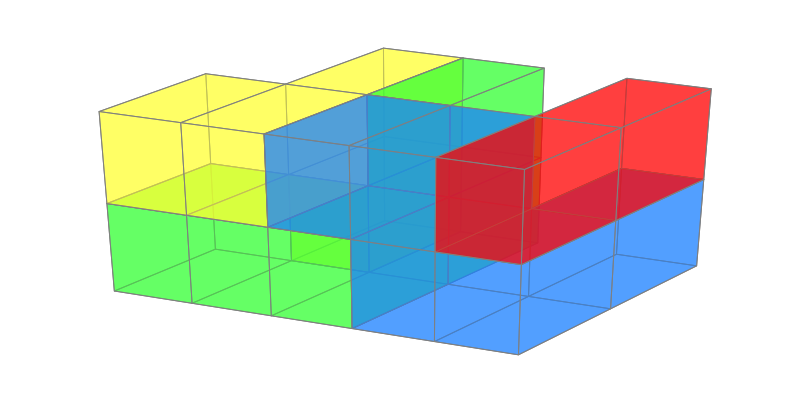

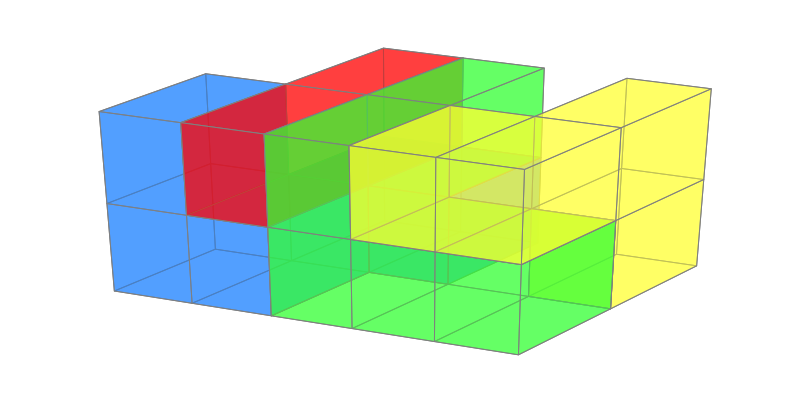

In [3]:
target_puzzle = "4-24"
target_pieces = ['b5', 'g5', 'r2', 'y4']

solution_count, puzzle_solution = solve_puzzle(
    generate_basic_puzzle(puzzle_coordinates[target_puzzle], PUZZLE_HEIGHT),
    target_pieces
)

plot_solutions(target_pieces, puzzle_solution, solution_count)

### Get all piece combination solutions for a given puzzle
<a id='finder'></a>

In [4]:
target_puzzle = "running_centipede"    
find_all_solvable_piece_combinations(target_puzzle)

looking at combinations of  1 pieces
looking at combinations of  2 pieces
looking at combinations of  3 pieces
looking at combinations of  4 pieces
looking at combinations of  5 pieces
2022-04-04 16:46:45.423873
solution count for: ['g5', 'y5', 'r4', 'y4', 'r2'] 0
2022-04-04 16:46:46.841096
solution count for: ['y5', 'b4', 'r4', 'y4', 'g3'] 0
2022-04-04 16:46:50.284152
solution count for: ['g5', 'b4', 'r4', 'y4', 'g3'] 0
2022-04-04 16:46:55.655908
solution count for: ['g5', 'y5', 'b4', 'y4', 'r2'] 0
2022-04-04 16:46:57.686495
solution count for: ['g5', 'y5', 'b4', 'r4', 'r2'] 2
2022-04-04 16:46:59.145484
solution count for: ['b5', 'y5', 'b4', 'y4', 'r2'] 8
2022-04-04 16:47:01.042320
solution count for: ['b5', 'y5', 'b4', 'r4', 'r2'] 8
2022-04-04 16:47:03.097790
solution count for: ['b5', 'b4', 'r4', 'y4', 'g3'] 8
2022-04-04 16:47:12.027838
solution count for: ['b5', 'g5', 'b4', 'y4', 'r2'] 0
2022-04-04 16:47:13.492729
solution count for: ['b5', 'g5', 'b4', 'r4', 'r2'] 2
2022-04-04 16:4